In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

In [3]:
path = 'data/'

In [4]:
leuk = pd.read_csv(path+'Leukemia/data.txt', sep='\t', index_col=0)
GM_HEK = pd.read_csv(path+'GM12878vsHEK/data.txt', sep='\t', index_col=0)
GM_HL = pd.read_csv(path+'GM12878vsHL/data.txt', sep='\t', index_col=0)
insilico = pd.read_csv(path+'InSilico/data.txt', sep='\t', index_col=0)
splenocytes = pd.read_csv(path+'Splenocyte/data.txt', sep='\t', index_col=0)
forebrain = pd.read_csv(path+'Forebrain/data.txt', sep='\t', index_col=0)
piATAC= pd.read_csv(path+'Breast_Tumor/data.txt', sep='\t', index_col=0)

## Sparsity

### cell count distribution

/home/xionglei/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


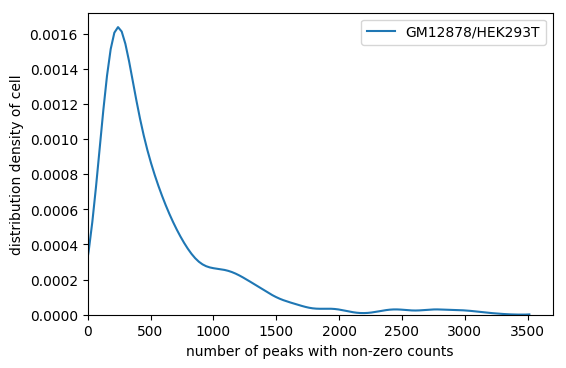

GM12878/HEK293T
[total cells] 526	[total peaks] 12938	[peak=1] 46.0	[peak>=2] 512.6	[sparsity] 0.9568


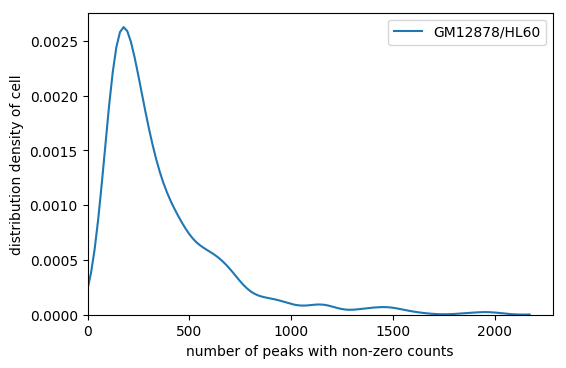

GM12878/HL60
[total cells] 597	[total peaks] 10431	[peak=1] 16.0	[peak>=2] 347.4	[sparsity] 0.9652


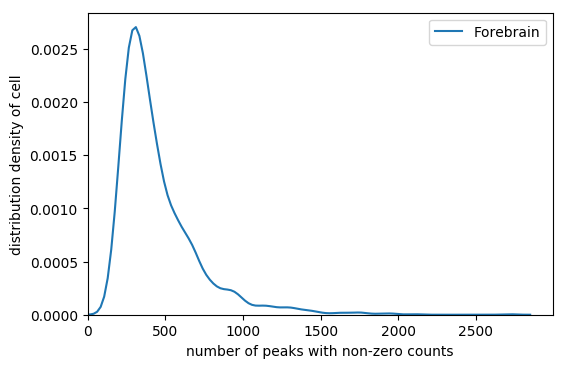

Forebrain
[total cells] 2088	[total peaks] 11285	[peak=1] 455.4	[peak>=2] 0.0	[sparsity] 0.9596


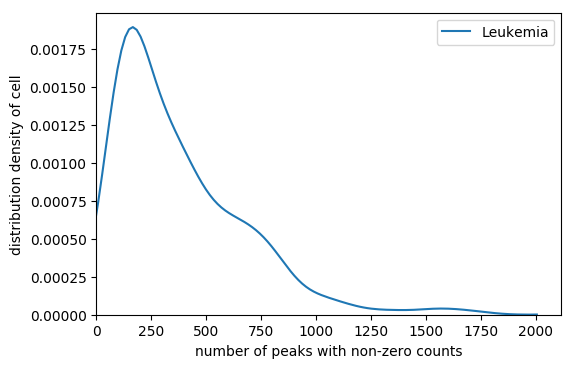

Leukemia
[total cells] 391	[total peaks] 7602	[peak=1] 17.3	[peak>=2] 361.5	[sparsity] 0.9502


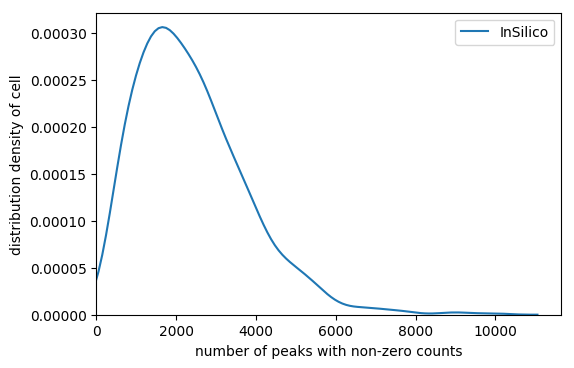

InSilico
[total cells] 828	[total peaks] 13668	[peak=1] 85.2	[peak>=2] 2306.2	[sparsity] 0.8250


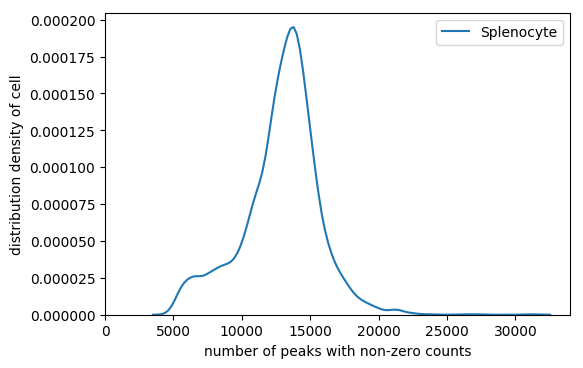

Splenocyte
[total cells] 3166	[total peaks] 77453	[peak=1] 1601.5	[peak>=2] 11266.3	[sparsity] 0.8339


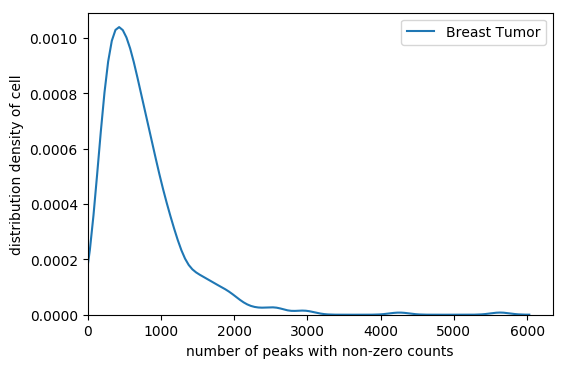

Breast Tumor
[total cells] 384	[total peaks] 27884	[peak=1] 691.5	[peak>=2] 57.4	[sparsity] 0.9731


[Text(0, 0, 'GM12878/HEK293T'),
 Text(0, 0, 'GM12878/HL60'),
 Text(0, 0, 'Forebrain'),
 Text(0, 0, 'Leukemia'),
 Text(0, 0, 'InSilico'),
 Text(0, 0, 'Splenocyte'),
 Text(0, 0, 'Breast Tumor')]

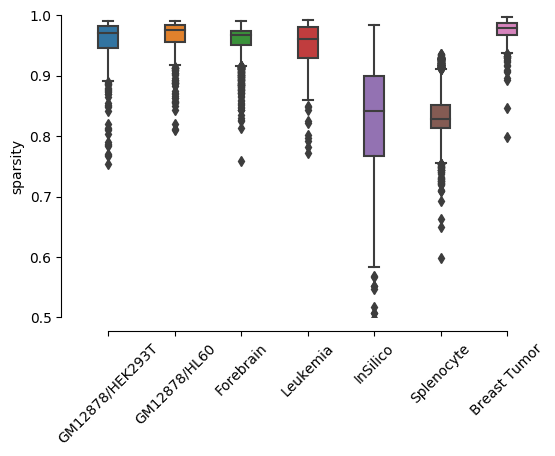

In [5]:
count_list = []
datasets = ['GM12878/HEK293T', 'GM12878/HL60', 'Forebrain', 'Leukemia', 'InSilico', 'Splenocyte','Breast Tumor']
for i, data in enumerate([GM_HEK, GM_HL, forebrain, leuk, insilico, splenocytes, piATAC]):
    count = data[data>0].count(0)
    sparsity = 1-count/data.shape[0]
    count_list.append(sparsity)
    
    count1 = data[data==1].count()
    count2 = data[data>1].count()
    count_ = data[data>=1].count()

    sns.distplot(count_, hist=False, kde=True, bins=30, label=datasets[i])

    plt.xlabel('number of peaks with non-zero counts')
    plt.ylabel('distribution density of cell')
    plt.xlim(0, )
    plt.show()
    print(datasets[i])
    print('[total cells] {}\t[total peaks] {}\t[peak=1] {:.1f}\t[peak>=2] {:.1f}\t[sparsity] {:.4f}'.format(
        data.shape[1], data.shape[0], count1.mean(), count2.mean(), sparsity.mean()))
# plt.legend()
# plt.xlabel('non-zero peak number')
# plt.ylabel('cell density')
# plt.show()
g = sns.boxplot(data=count_list, width=0.3)
plt.ylim(0.5, 1)
plt.ylabel('sparsity')
sns.despine(offset=10, trim=True)
g.set_xticklabels(datasets, rotation=45)

### peak count distribution